In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import queries
from sqlalchemy import create_engine
from secrets import secrets

warnings.filterwarnings("ignore")

# Extract Data

In [2]:
engine = create_engine(secrets['indeed_db'])

## Data Analyst

In [3]:
df_da = pd.read_sql_query(queries.jobs_query.format('Data_Analyst'), con=engine)
df_da.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,DATA ANALYST,D'YANA INTERNATIONAL,None,Malaysia,2020-04-10,Looking for a candidate who loves crunching nu...,https://www.indeed.com.my//rc/clk?jk=52559f104...,"'Data Analysis', 'Excel', 'R', 'Statistics'",None
1,Data Informatics Analyst,National instrument,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=e61ab28da...,"'C', 'Go', 'R'",None
2,Data Informatics Analyst,National Instruments,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=45d36230e...,"'C', 'Go', 'R'",None
3,Data Analyst (Quality),Latexx,None,Malaysia,2020-04-10,Data Analyst (Quality)ResponsibilitiesLocate a...,https://www.indeed.com.my//rc/clk?jk=4a24763c5...,"'C', 'Excel', 'Java', 'R', 'SAS', 'SPSS', 'SQL...",None
4,BI Data Analyst,Shopee,None,Kuala Lumpur,2020-04-10,Job Description:Work closely with Warehouse te...,https://www.indeed.com.my//rc/clk?jk=8b805d72b...,"'C', 'Python', 'R', 'SQL'",None


In [4]:
df_da.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,5350,5295,1085,5127,5276,5350,5350,5156,1569
unique,1851,768,228,89,174,2354,2808,632,19
top,Principal Salesforce Developer,iPrice group,"RM 5,000 - RM 7,000 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my/rc/clk?jk=8f5e920e7e...,"'C', 'R'",'Senior'
freq,126,246,98,2006,1988,105,64,1047,862


In [5]:
df_da = df_da.drop_duplicates()
df_da.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,2914,2861,614,2766,2841,2914,2914,2757,720
unique,1851,768,228,89,174,2354,2808,632,19
top,Business Analyst,Ambition,"RM 4,000 - RM 4,500 a month",Kuala Lumpur,2020-04-10,No Description,https://www.indeed.com.my/company/Agensi-Peker...,"'C', 'R'",'Senior'
freq,71,75,29,1207,533,105,3,551,381


## Data Engineer

In [6]:
df_de = pd.read_sql_query(queries.jobs_query.format('Data_Engineer'), con=engine)
df_de.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,Data Engineer,KPMG,None,Petaling Jaya,2020-05-04,We help organizations to work smarter and grow...,https://www.indeed.com.my//rc/clk?jk=2b236e08a...,"'C', 'Java', 'R'",None
1,Wells Data Engineer,Seacom,None,Malaysia,2020-04-10,Position: Wells Data EngineerLocation: Peninsu...,https://www.indeed.com.my//rc/clk?jk=005edeb55...,'C',None
2,Junior Engineer,Ematic Solutions,None,Malaysia,2020-05-04,JOB DESCRIPTIONWHO WE AREReady for your next c...,https://www.indeed.com.my//rc/clk?jk=b24e15d9c...,"'C', 'Excel', 'R', 'SQL'",'Junior'
3,ITC Engineer,Bombardier,None,Kuala Lumpur,2020-05-06,ITC Engineer-TRCS-MAKU02280520DescriptionAt Bo...,https://www.indeed.com.my//rc/clk?jk=f9b066894...,"'C', 'R'",None
4,Production Engineer,Malayan Flour Mills Berhad,None,Lumut,2020-04-29,Company DescriptionMalayan Flour Mills Berhad ...,https://www.indeed.com.my//rc/clk?jk=1507113f3...,"'C', 'R'",None


In [7]:
df_de.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,6274,6214,1603,6005,6214,6274,6274,5978,1942
unique,2080,985,242,118,168,2739,3304,858,21
top,Software Engineer,iPrice group,"RM 3,500 - RM 5,500 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my/rc/clk?jk=3d89b168a5...,"'C', 'R'",'Senior'
freq,105,326,70,1846,2004,157,64,1495,1173


In [8]:
df_de = df_de.drop_duplicates()
df_de.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,3393,3333,759,3216,3333,3393,3393,3168,877
unique,2080,985,242,118,168,2739,3304,858,21
top,Software Engineer,Micron,"RM 2,500 - RM 3,000 a month",Kuala Lumpur,2020-07-26,No Description,https://www.indeed.com.my//rc/clk?jk=83dfdabca...,"'C', 'R'",'Senior'
freq,64,88,22,992,590,156,2,817,514


## Data Scientist

In [9]:
df_ds = pd.read_sql_query(queries.jobs_query.format('Data_Scientist'), con=engine)
df_ds.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,Data Scientist,KPMG,None,Petaling Jaya,2020-05-04,We help organizations to work smarter and grow...,https://www.indeed.com.my//rc/clk?jk=af48e13a1...,"'C', 'Deep Learning', 'Machine Learning', 'Nat...",None
1,Data Scientist,Telenor,None,Malaysia,2020-04-10,W e are looking for a data scientist that will...,https://www.indeed.com.my//rc/clk?jk=c0285648d...,"'C', 'Java', 'Python', 'R', 'SQL'",None
2,"Intern, Data Scientist",DiGi Telecommunications,None,Shah Alam,2020-04-10,Do you want to supplement your degree with act...,https://www.indeed.com.my//rc/clk?jk=58ba13258...,"'C', 'R', 'SAS', 'SPSS', 'SQL', 'Statistics'",'Intern'
3,Data Scientist,DiGi Telecommunications,None,Shah Alam,2020-04-10,We are looking for a data scientist that will ...,https://www.indeed.com.my//rc/clk?jk=99ac82133...,"'C', 'Java', 'Python', 'R', 'SQL'",None
4,Data Scientist,Thakral One Solutions Private Limited,None,Kuala Lumpur,2020-04-28,Role: Machine learning engineer/Data Scientist...,https://www.indeed.com.my//rc/clk?jk=abe2b27c7...,"'Artificial Intelligence', 'C', 'Go', 'MySQL',...",None


In [10]:
df_ds.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,817,812,142,794,802,817,817,809,283
unique,218,165,44,34,105,356,405,259,12
top,Data Scientist,Synvue Sdn Bhd,"RM 3,500 - RM 4,500 a month",Kuala Lumpur,2020-07-26,A great opportunity has just opened up with a ...,https://www.indeed.com.my/rc/clk?jk=a66a2b1201...,"'C', 'Excel', 'R'",'Senior'
freq,111,46,29,345,258,13,12,80,155


In [11]:
df_ds = df_ds.drop_duplicates()
df_ds.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,420,415,72,401,405,420,420,416,129
unique,218,165,44,34,105,356,405,259,12
top,Data Scientist,IHS Markit,"RM 3,500 - RM 4,500 a month",Kuala Lumpur,2020-07-26,Company DescriptionGreat internships are not o...,https://www.indeed.com.my/rc/clk?jk=c78cafbe23...,"'C', 'Excel', 'R'",'Senior'
freq,74,22,13,179,82,7,2,25,63


## Machine Learning Engineer

In [12]:
df_mle = pd.read_sql_query(queries.jobs_query.format('Machine_Learning_Engineer'), con=engine)
df_mle.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
0,Machine Learning Engineer,Unlock Design International Sdn Bhd,None,Kuala Lumpur,2020-04-29,Job Description :â—Develop and operate image a...,https://www.indeed.com.my//rc/clk?jk=c992e09ac...,"'AWS', 'C', 'Git', 'Github', 'Python', 'R'",None
1,Machine Learning Engineer,3E Accounting Malaysia,None,Kuala Lumpur,2020-04-10,Description3E Accounting Malaysia is currently...,https://www.indeed.com.my//rc/clk?jk=4becba666...,"'C', 'Machine Learning', 'R'",None
2,DevOps Engineer,AmTrust Mobile Solutions Asia,None,Malaysia,2020-04-10,Division : Tech. Department1. Job PurposeDevel...,https://www.indeed.com.my//rc/clk?jk=8ac2bf1d3...,"'Artificial Intelligence', 'AWS', 'C', 'Docker...",None
3,Senior Site Reliability Engineer,AmTrust Mobile Solutions Asia,None,Malaysia,2020-04-10,Division : Tech. Department1. Job PurposeDevel...,https://www.indeed.com.my//rc/clk?jk=cd7b4f8c2...,"'Artificial Intelligence', 'AWS', 'C', 'Docker...",'Senior'
4,Technical Product Engineer ( Halcon Trainer),EPS Malaysia,None,Malaysia,2020-04-10,Core JOB DESCRIPTION:-Reports directly to the ...,https://www.indeed.com.my//rc/clk?jk=9574f3e9e...,"'C', 'C++', 'Computer Vision', 'Deep Learning'...",None


In [13]:
df_mle.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,571,555,114,544,544,571,571,561,226
unique,218,127,39,41,106,313,362,195,11
top,Senior Data Engineer,Micron,"RM 9,000 - RM 13,000 a month",Kuala Lumpur,2020-07-27,The Senior Data Engineer will be working withi...,https://www.indeed.com.my/rc/clk?jk=772f141038...,"'C', 'R'",'Senior'
freq,55,53,26,175,118,20,6,43,154


In [14]:
df_mle = df_mle.drop_duplicates()
df_mle.describe(include='object')

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords
count,369,353,67,342,342,369,369,360,129
unique,218,127,39,41,106,313,362,195,11
top,Senior Data Engineer,Micron,"RM 9,000 - RM 13,000 a month",Kuala Lumpur,2020-04-10,The Senior Data Engineer will be working withi...,https://www.indeed.com.my/rc/clk?jk=8333ca5aaa...,"'C', 'R'",'Senior'
freq,30,44,16,110,47,14,2,28,85


In [15]:
engine.dispose()

# Data Cleaning

### Title Keywords

In [16]:
df_da['Title_Keywords'].unique()

array([None, "'Associate', 'Assoc'", "'Lead'", "'Senior'", "'Junior'",
       "'Intern'", "'Graduate'", "'Junior', 'Intern'", "'Sr'",
       "'Sr.', 'Sr'", "'Consultant'", "'Senior', 'Consultant'",
       "'Associate', 'Assoc', 'Senior'", "'Junior', 'Senior'", "'Head'",
       "'Senior', 'Lead'", "'Chief'", "'Assoc'", "'Part-time'",
       "'Associate', 'Assoc', 'Consultant'"], dtype=object)

In [17]:
df_de['Title_Keywords'].unique()

array([None, "'Junior'", "'Graduate'", "'Head'", "'Intern'", "'Lead'",
       "'Senior'", "'Associate', 'Assoc'", "'Consultant'",
       "'Junior', 'Senior'", "'Chief'", "'Senior', 'Lead'", "'Sr.', 'Sr'",
       "'Sr'", "'Graduate', 'Intern'", "'Jr.', 'Jr', 'Sr.', 'Sr'",
       "'Jr.', 'Jr', 'Sr'", "'Associate', 'Assoc', 'Senior'", "'Assoc'",
       "'Junior', 'Senior', 'Lead'", "'Mid-Level'",
       "'Associate', 'Assoc', 'Intern'"], dtype=object)

In [18]:
df_ds['Title_Keywords'].unique()

array([None, "'Intern'", "'Associate', 'Assoc'", "'Senior'", "'Lead'",
       "'Head'", "'Sr.', 'Sr'", "'Consultant'", "'Junior'", "'Sr'",
       "'Chief'", "'Senior', 'Intern'", "'Senior', 'Lead'"], dtype=object)

In [19]:
df_mle['Title_Keywords'].unique()

array([None, "'Senior'", "'Intern'", "'Graduate'", "'Lead'",
       "'Associate', 'Assoc'", "'Junior', 'Senior'", "'Head'",
       "'Consultant'", "'Senior', 'Lead'", "'Sr.', 'Sr'", "'Sr'"],
      dtype=object)

In [20]:
juniors = ['Junior', 'Intern', 'Graduate', 'Part-time', 'Jr', 'Jr.', 'Internship']
mid_level = ['Associate', 'Assoc', 'Manager' 'Consultant']
senior = ['Senior', 'Lead', 'Sr', 'Sr.', 'Chief', 'Head', 'Master', 'Executive', 'Principal']

def assign_level(title_keywords):
    levels = ""
    if title_keywords is None:
        return levels
    titles = [t.strip(" ") for t in title_keywords.split(",")]
    if len([t for t in titles if t.strip("'") in juniors]) > 0:
        levels += "Junior"
    if len([t for t in titles if t.strip("'") in mid_level]) > 0:
        levels += " Mid Level"
    if len([t for t in titles if t.replace("'", "") in senior]) > 0:
        levels += " Senior"
    return levels

In [21]:
df_da['Levels'] = df_da['Title_Keywords'].apply(lambda x: assign_level(x))
df_da.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords,Levels
0,DATA ANALYST,D'YANA INTERNATIONAL,None,Malaysia,2020-04-10,Looking for a candidate who loves crunching nu...,https://www.indeed.com.my//rc/clk?jk=52559f104...,"'Data Analysis', 'Excel', 'R', 'Statistics'",None,
1,Data Informatics Analyst,National instrument,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=e61ab28da...,"'C', 'Go', 'R'",None,
2,Data Informatics Analyst,National Instruments,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=45d36230e...,"'C', 'Go', 'R'",None,
3,Data Analyst (Quality),Latexx,None,Malaysia,2020-04-10,Data Analyst (Quality)ResponsibilitiesLocate a...,https://www.indeed.com.my//rc/clk?jk=4a24763c5...,"'C', 'Excel', 'Java', 'R', 'SAS', 'SPSS', 'SQL...",None,
4,BI Data Analyst,Shopee,None,Kuala Lumpur,2020-04-10,Job Description:Work closely with Warehouse te...,https://www.indeed.com.my//rc/clk?jk=8b805d72b...,"'C', 'Python', 'R', 'SQL'",None,


In [22]:
df_de['Levels'] = df_de['Title_Keywords'].apply(lambda x: assign_level(x))
df_ds['Levels'] = df_ds['Title_Keywords'].apply(lambda x: assign_level(x))
df_mle['Levels'] = df_mle['Title_Keywords'].apply(lambda x: assign_level(x))

### Level from Job Title

In [23]:
def get_level_from_title(job_title):
    levels = ""
    titles = [t.lower() for t in job_title.split(" ")]
    if len([t for t in titles if t.title() in juniors]) > 0:
        levels += " Junior"
    if len([t for t in titles if t.title() in mid_level]) > 0:
        levels += " Mid Level"
    if len([t for t in titles if t.title() in senior]) > 0:
        levels += " Senior"
    return levels

In [24]:
df_da['Levels'] += df_da['Job_Title'].apply(lambda x: get_level_from_title(x))
df_da.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords,Levels
0,DATA ANALYST,D'YANA INTERNATIONAL,None,Malaysia,2020-04-10,Looking for a candidate who loves crunching nu...,https://www.indeed.com.my//rc/clk?jk=52559f104...,"'Data Analysis', 'Excel', 'R', 'Statistics'",None,
1,Data Informatics Analyst,National instrument,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=e61ab28da...,"'C', 'Go', 'R'",None,
2,Data Informatics Analyst,National Instruments,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=45d36230e...,"'C', 'Go', 'R'",None,
3,Data Analyst (Quality),Latexx,None,Malaysia,2020-04-10,Data Analyst (Quality)ResponsibilitiesLocate a...,https://www.indeed.com.my//rc/clk?jk=4a24763c5...,"'C', 'Excel', 'Java', 'R', 'SAS', 'SPSS', 'SQL...",None,
4,BI Data Analyst,Shopee,None,Kuala Lumpur,2020-04-10,Job Description:Work closely with Warehouse te...,https://www.indeed.com.my//rc/clk?jk=8b805d72b...,"'C', 'Python', 'R', 'SQL'",None,


In [25]:
df_de['Levels'] += df_da['Job_Title'].apply(lambda x: get_level_from_title(x))
df_ds['Levels'] += df_ds['Job_Title'].apply(lambda x: get_level_from_title(x))
df_mle['Levels'] += df_mle['Job_Title'].apply(lambda x: get_level_from_title(x))

### Years of Experience Required

In [26]:
# Juniors: 1-3 years required
junior_min = 1
# Mid Level: 3-8 years required
midlevel_min = 3
# Senior Level: more than 8 years required
senior_min = 8

def get_years_experience(description):
    try:
        cur = description.index("years")
        year_required = max([int(r) for r in re.findall(r'\d+', description[cur-5:cur+6])])
        return year_to_level(year_required)
    except:
        try:
            cur = description.index("year(s)")
            year_required = max([int(r) for r in re.findall(r'\d+', description[cur-5:cur+6])])
            return year_to_level(year_required)
        except:
            try:
                cur = description.index("year")
                year_required = max([int(r) for r in re.findall(r'\d+', description[cur-5:cur+6])])
                return year_to_level(year_required)
            except:
                return ""

def year_to_level(year):
    if year >= senior_min:
        return " Senior"
    elif year >= midlevel_min:
        return " Mid Level"
    else:
        return " Junior"

In [27]:
df_da['Levels'] += df_da['Description'].apply(lambda x: get_years_experience(x))
df_da.head()

,Job_Title,Company,Salary,Location,Date_Posted,Description,Job_URL,Keywords_Present,Title_Keywords,Levels
0,DATA ANALYST,D'YANA INTERNATIONAL,None,Malaysia,2020-04-10,Looking for a candidate who loves crunching nu...,https://www.indeed.com.my//rc/clk?jk=52559f104...,"'Data Analysis', 'Excel', 'R', 'Statistics'",None,
1,Data Informatics Analyst,National instrument,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=e61ab28da...,"'C', 'Go', 'R'",None,
2,Data Informatics Analyst,National Instruments,None,Bayan Lepas,2020-04-23,"APAC Data Informatics Analyst, APAC Sales Info...",https://www.indeed.com.my//rc/clk?jk=45d36230e...,"'C', 'Go', 'R'",None,
3,Data Analyst (Quality),Latexx,None,Malaysia,2020-04-10,Data Analyst (Quality)ResponsibilitiesLocate a...,https://www.indeed.com.my//rc/clk?jk=4a24763c5...,"'C', 'Excel', 'Java', 'R', 'SAS', 'SPSS', 'SQL...",None,Mid Level
4,BI Data Analyst,Shopee,None,Kuala Lumpur,2020-04-10,Job Description:Work closely with Warehouse te...,https://www.indeed.com.my//rc/clk?jk=8b805d72b...,"'C', 'Python', 'R', 'SQL'",None,Mid Level


In [28]:
df_de['Levels'] += df_de['Description'].apply(lambda x: get_years_experience(x))
df_ds['Levels'] += df_ds['Description'].apply(lambda x: get_years_experience(x))
df_mle['Levels'] += df_mle['Description'].apply(lambda x: get_years_experience(x))

### Extract Salary Information

In [29]:
def extract_salary(df_job):
    df = df_job.copy()
    df[['Salary L', 'Salary U']] = df['Salary'].str.split('-', 1, expand=True)
    df = df[['Job_Title', 'Salary', 'Levels', 'Salary L', 'Salary U']]
    # Set Upper NaN to Lower
    df.loc[df['Salary U'].isna(), 'Salary U'] = df.loc[df['Salary U'].isna(), 'Salary L']
    # Convert to Numeric
    df['Salary L'] = df['Salary L'].map(lambda x: ''.join(filter(str.isdigit, x)))
    df['Salary U'] = df['Salary U'].map(lambda x: ''.join(filter(str.isdigit, x)))
    df['Salary L'] = df['Salary L'].map(lambda x: float(x.replace(',', '')))
    df['Salary U'] = df['Salary U'].map(lambda x: float(x.replace(',', '')))
    # Convert hours to month
    # Average 166.4 hours of work per month
    df.loc[df['Salary'].str.contains('hour'), 'Salary L'] *= 166.4
    df.loc[df['Salary'].str.contains('hour'), 'Salary U'] *= 166.4
    # Convert days to month
    # Average 20.8 days of work per month
    df.loc[df['Salary'].str.contains('day'), 'Salary L'] *= 20.8
    df.loc[df['Salary'].str.contains('day'), 'Salary U'] *= 20.8
    # Convert weeks to month
    # Average 4.3 weeks of work per month
    df.loc[df['Salary'].str.contains('week'), 'Salary L'] *= 4.345
    df.loc[df['Salary'].str.contains('week'), 'Salary U'] *= 4.345
    # Convert years to month
    df.loc[df['Salary'].str.contains('year'), 'Salary L'] /= 12
    df.loc[df['Salary'].str.contains('year'), 'Salary U'] /= 12
    # Mean salary
    df['Salary M'] = df[['Salary L', 'Salary U']].mean(axis=1)
    return df

### Clean All Data

In [59]:
df_dac = extract_salary(df_da.fillna('0'))
df_dac.loc[df_dac['Levels'] == "", 'Levels'] = 'Mid Level'
df_dac.head()

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
0,DATA ANALYST,0,Mid Level,0.0,0.0,0.0
1,Data Informatics Analyst,0,Mid Level,0.0,0.0,0.0
2,Data Informatics Analyst,0,Mid Level,0.0,0.0,0.0
3,Data Analyst (Quality),0,Mid Level,0.0,0.0,0.0
4,BI Data Analyst,0,Mid Level,0.0,0.0,0.0


In [60]:
df_dac.loc[df_dac['Salary'] != '0'].describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,614,614,614,614.000000,614.000000,614.000000
unique,411,228,21,NaN,NaN,NaN
top,Data Analyst,"RM 4,000 - RM 4,500 a month",Mid Level,NaN,NaN,NaN
freq,29,29,174,NaN,NaN,NaN
mean,NaN,NaN,NaN,4755.779237,6477.263868,5616.521553
std,NaN,NaN,NaN,2894.502556,3510.498425,3119.340933
min,NaN,NaN,NaN,300.000000,500.000000,400.000000
25%,NaN,NaN,NaN,3000.000000,4500.000000,3825.000000
50%,NaN,NaN,NaN,4000.000000,5500.000000,5000.000000
75%,NaN,NaN,NaN,5500.000000,8000.000000,7000.000000


In [41]:
df_dec = extract_salary(df_de.fillna('0'))
df_dec.loc[df_dec['Levels'] == "", 'Levels'] = 'Mid Level'
df_dec.head()

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
0,Data Engineer,0,Mid Level,0.0,0.0,0.0
1,Wells Data Engineer,0,Mid Level,0.0,0.0,0.0
2,Junior Engineer,0,Junior Junior,0.0,0.0,0.0
3,ITC Engineer,0,Mid Level,0.0,0.0,0.0
4,Production Engineer,0,Mid Level,0.0,0.0,0.0


In [42]:
df_dec.loc[df_dec['Salary'] != '0'].describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,759,759,759,759.000000,759.000000,759.000000
unique,514,242,23,NaN,NaN,NaN
top,Software Engineer,"RM 2,500 - RM 3,000 a month",0,NaN,NaN,NaN
freq,26,22,403,NaN,NaN,NaN
mean,NaN,NaN,NaN,4458.405797,6469.807202,5464.106500
std,NaN,NaN,NaN,2781.914786,3772.478561,3182.886143
min,NaN,NaN,NaN,300.000000,300.000000,300.000000
25%,NaN,NaN,NaN,2500.000000,3500.000000,3050.000000
50%,NaN,NaN,NaN,4000.000000,6000.000000,4750.000000
75%,NaN,NaN,NaN,5250.000000,8000.000000,7000.000000


In [44]:
df_dsc = extract_salary(df_ds.fillna('0'))
df_dsc.loc[df_dsc['Levels'] == "", 'Levels'] = 'Mid Level'
df_dsc.head()

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
0,Data Scientist,0,Mid Level,0.0,0.0,0.0
1,Data Scientist,0,Junior,0.0,0.0,0.0
2,"Intern, Data Scientist",0,Junior,0.0,0.0,0.0
3,Data Scientist,0,Junior,0.0,0.0,0.0
4,Data Scientist,0,Mid Level,0.0,0.0,0.0


In [45]:
df_dsc.loc[df_dsc['Salary'] != '0'].describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,72,72,72,72.000000,72.000000,72.000000
unique,42,44,10,NaN,NaN,NaN
top,Data Scientist,"RM 3,500 - RM 4,500 a month",Mid Level,NaN,NaN,NaN
freq,15,13,19,NaN,NaN,NaN
mean,NaN,NaN,NaN,6035.115741,8651.805556,7343.460648
std,NaN,NaN,NaN,4438.003823,5939.167117,5079.772501
min,NaN,NaN,NaN,500.000000,500.000000,500.000000
25%,NaN,NaN,NaN,3500.000000,4500.000000,4000.000000
50%,NaN,NaN,NaN,4000.000000,5500.000000,5050.000000
75%,NaN,NaN,NaN,8000.000000,10022.000000,9000.000000


In [46]:
df_mlec = extract_salary(df_mle.fillna('0'))
df_mlec.loc[df_mlec['Levels'] == "", 'Levels'] = 'Mid Level'
df_mlec.head()

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
0,Machine Learning Engineer,0,Mid Level,0.0,0.0,0.0
1,Machine Learning Engineer,0,Mid Level,0.0,0.0,0.0
2,DevOps Engineer,0,Mid Level,0.0,0.0,0.0
3,Senior Site Reliability Engineer,0,Senior Senior Senior,0.0,0.0,0.0
4,Technical Product Engineer ( Halcon Trainer),0,Mid Level,0.0,0.0,0.0


In [47]:
df_mlec.loc[df_mlec['Salary'] != '0'].describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,67,67,67,67.000000,67.000000,67.000000
unique,44,39,12,NaN,NaN,NaN
top,Senior Data Engineer,"RM 9,000 - RM 13,000 a month",Senior Senior Mid Level,NaN,NaN,NaN
freq,16,16,16,NaN,NaN,NaN
mean,NaN,NaN,NaN,5360.656716,8040.716418,6700.686567
std,NaN,NaN,NaN,3305.367946,4705.378479,3935.638804
min,NaN,NaN,NaN,500.000000,500.000000,500.000000
25%,NaN,NaN,NaN,2550.000000,4750.000000,3875.000000
50%,NaN,NaN,NaN,4500.000000,7500.000000,6250.000000
75%,NaN,NaN,NaN,9000.000000,13000.000000,11000.000000


# Data Distribution

In [50]:
def plot_distribution(salary, title):
    fg, ax = plt.subplots(ncols=2, figsize=(16,8))
    salary.plot.hist(bins=20, ax=ax[0], title="{} Histogram".format(title))
    salary.plot.box(ax=ax[1], title="{} Box Plot".format(title))

def remove_outliers(salary):
    q1 = salary.describe()['25%']
    q3 = salary.describe()['75%']
    iqr = q3 - q1
    lf = q1 - 1.5 * iqr
    uf = q3 + 1.5 * iqr
    return salary[(salary >= lf) & (salary <= uf)]

### Data Analyst

In [65]:
df_das = df_dac.loc[df_dac['Salary'] == '0']
df_dac = df_dac.loc[df_dac['Salary'] != '0']
df_das.describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,2300,2300,2300,2300.0,2300.0,2300.0
unique,1541,1,26,NaN,NaN,NaN
top,Business Analyst,0,Mid Level,NaN,NaN,NaN
freq,55,2300,651,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.0,0.0,0.0
std,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,0.0,0.0,0.0
25%,NaN,NaN,NaN,0.0,0.0,0.0
50%,NaN,NaN,NaN,0.0,0.0,0.0
75%,NaN,NaN,NaN,0.0,0.0,0.0


In [66]:
df_dac.describe()

,Salary L,Salary U,Salary M
count,614.000000,614.000000,614.000000
mean,4755.779237,6477.263868,5616.521553
std,2894.502556,3510.498425,3119.340933
min,300.000000,500.000000,400.000000
25%,3000.000000,4500.000000,3825.000000
50%,4000.000000,5500.000000,5000.000000
75%,5500.000000,8000.000000,7000.000000
max,24000.000000,25000.000000,24000.000000


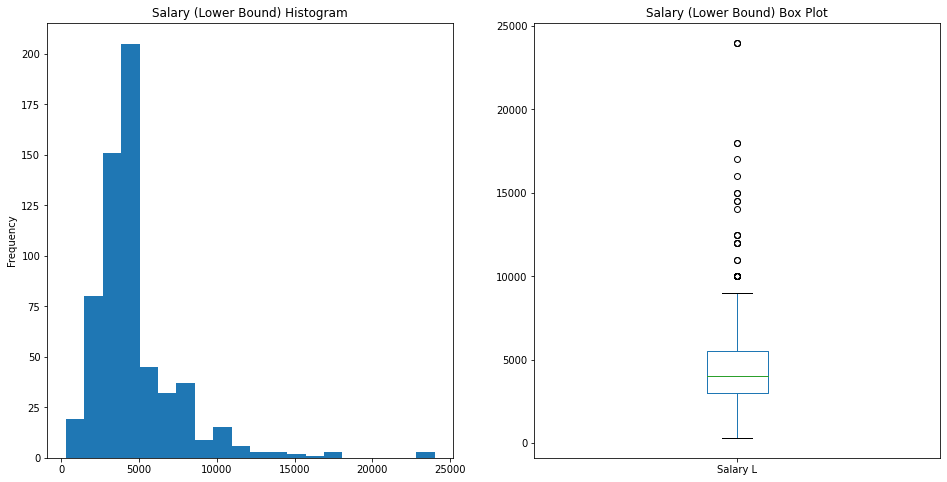

In [67]:
plot_distribution(df_dac['Salary L'], title="Salary (Lower Bound)")

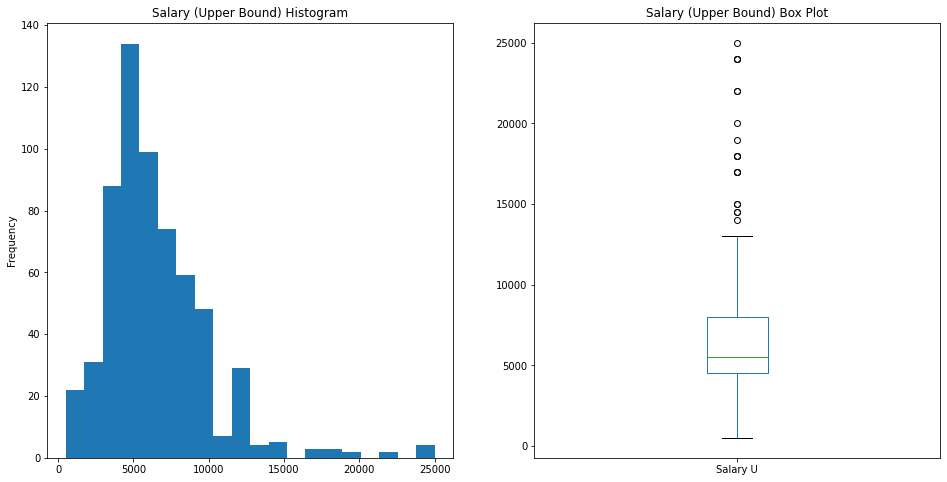

In [68]:
plot_distribution(df_dac['Salary U'], title="Salary (Upper Bound)")

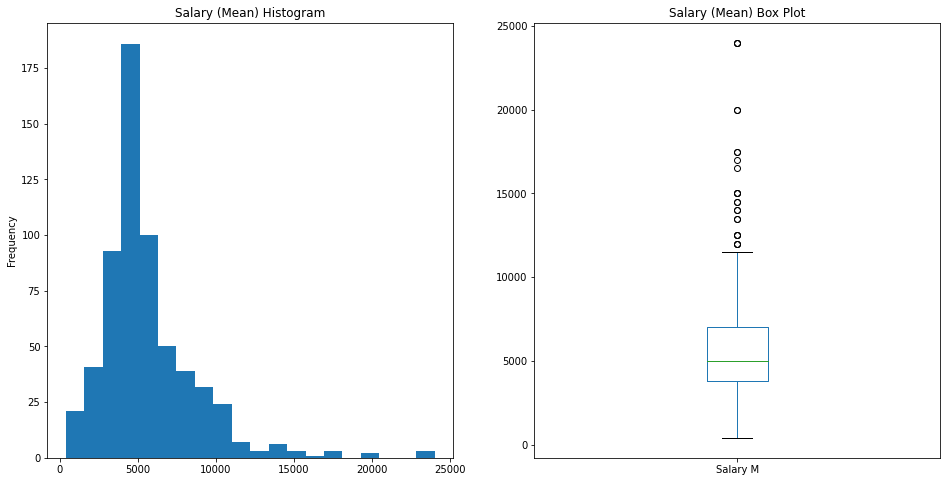

In [69]:
plot_distribution(df_dac['Salary M'], title="Salary (Mean)")

#### Without outliers

In [70]:
da_salary = remove_outliers(df_dac['Salary M'])
da_salary.describe()

count      590.000000
mean      5195.837684
std       2238.314010
min        400.000000
25%       3750.000000
50%       4750.000000
75%       6387.125000
max      11500.000000
Name: Salary M, dtype: float64

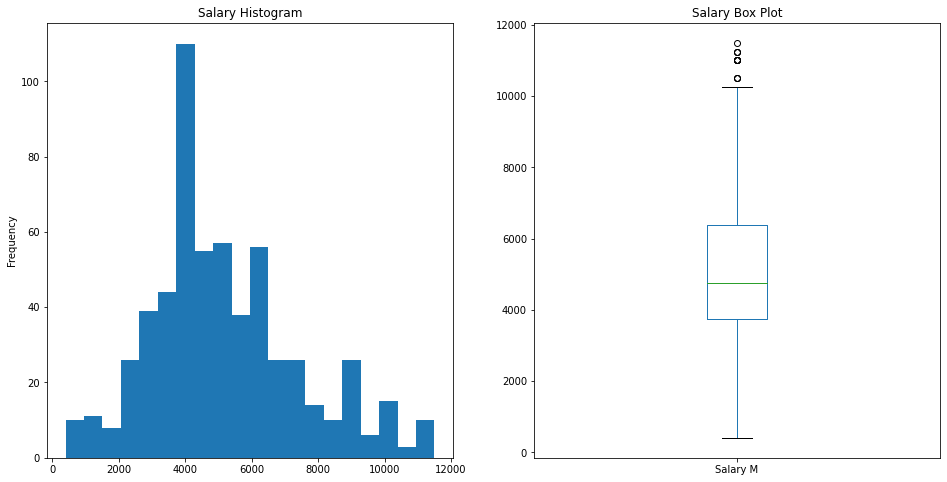

In [71]:
plot_distribution(da_salary, title="Salary")

### Data Engineer

In [72]:
df_des = df_dec.loc[df_dec['Salary'] == '0']
df_dec = df_dec.loc[df_dec['Salary'] != '0']
df_des.describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,2634,2634,2634,2634.0,2634.0,2634.0
unique,1693,1,32,NaN,NaN,NaN
top,Software Engineer,0,0,NaN,NaN,NaN
freq,38,2634,1153,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.0,0.0,0.0
std,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,0.0,0.0,0.0
25%,NaN,NaN,NaN,0.0,0.0,0.0
50%,NaN,NaN,NaN,0.0,0.0,0.0
75%,NaN,NaN,NaN,0.0,0.0,0.0


In [73]:
df_dec.describe()

,Salary L,Salary U,Salary M
count,759.000000,759.000000,759.000000
mean,4458.405797,6469.807202,5464.106500
std,2781.914786,3772.478561,3182.886143
min,300.000000,300.000000,300.000000
25%,2500.000000,3500.000000,3050.000000
50%,4000.000000,6000.000000,4750.000000
75%,5250.000000,8000.000000,7000.000000
max,20000.000000,24000.000000,20000.000000


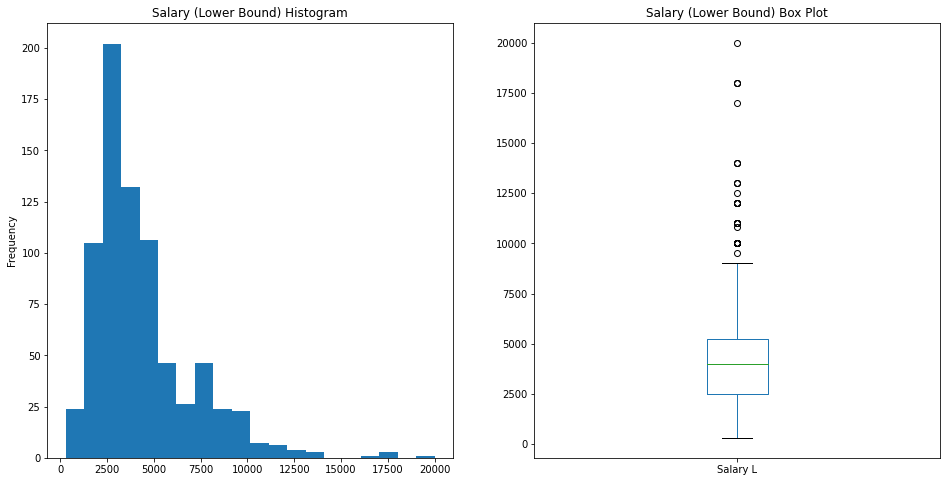

In [74]:
plot_distribution(df_dec['Salary L'], title="Salary (Lower Bound)")

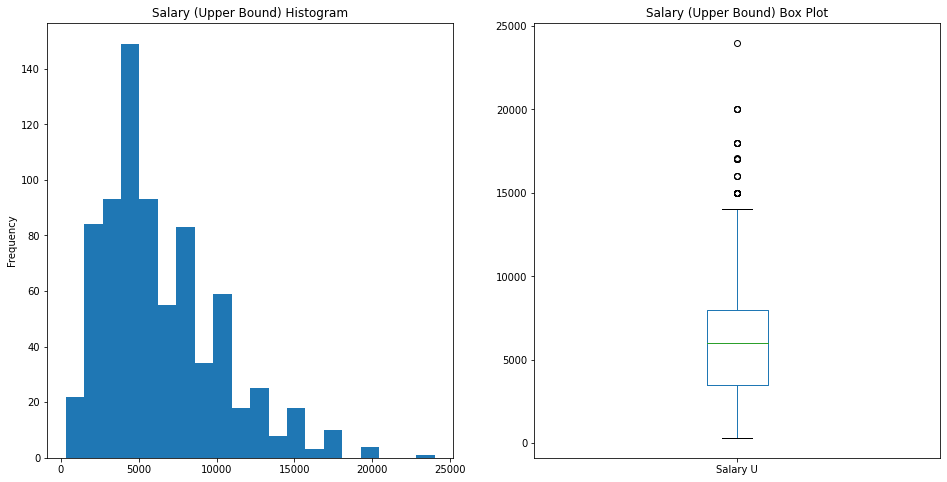

In [75]:
plot_distribution(df_dec['Salary U'], title="Salary (Upper Bound)")

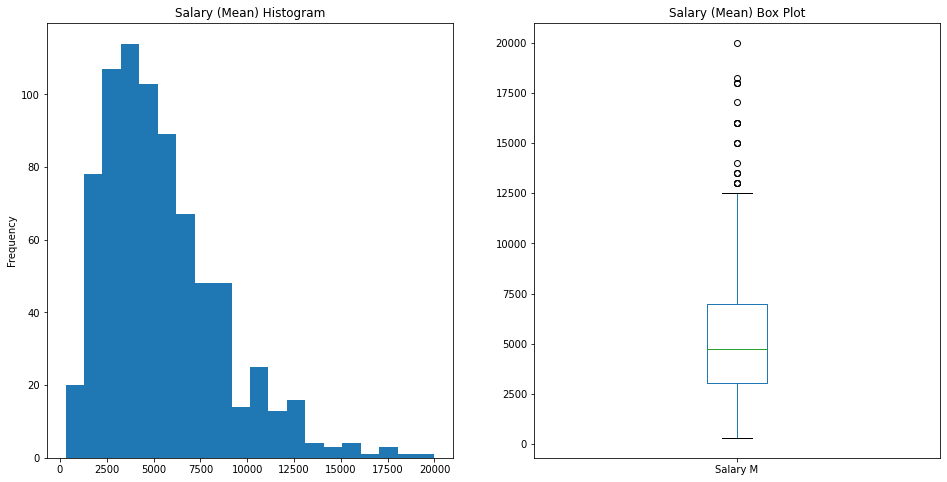

In [76]:
plot_distribution(df_dec['Salary M'], title="Salary (Mean)")

#### Without outliers

In [77]:
de_salary = remove_outliers(df_dec['Salary M'])
de_salary.describe()

count      738.000000
mean      5179.492096
std       2713.980404
min        300.000000
25%       3000.000000
50%       4654.250000
75%       6750.000000
max      12500.000000
Name: Salary M, dtype: float64

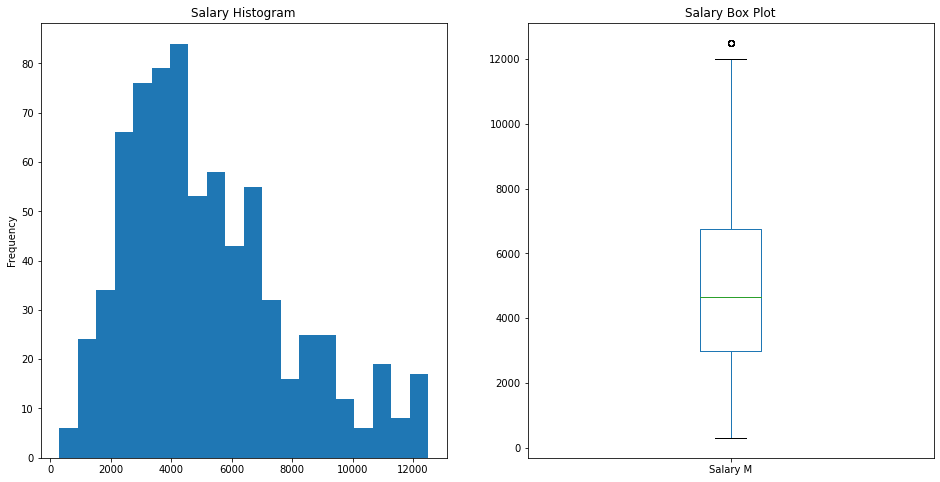

In [78]:
plot_distribution(de_salary, title="Salary")

### Data Scientist

In [79]:
df_dss = df_dsc.loc[df_dsc['Salary'] == '0']
df_dsc = df_dsc.loc[df_dsc['Salary'] != '0']
df_dss.describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,348,348,348,348.0,348.0,348.0
unique,187,1,17,NaN,NaN,NaN
top,Data Scientist,0,Mid Level,NaN,NaN,NaN
freq,59,348,90,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.0,0.0,0.0
std,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,0.0,0.0,0.0
25%,NaN,NaN,NaN,0.0,0.0,0.0
50%,NaN,NaN,NaN,0.0,0.0,0.0
75%,NaN,NaN,NaN,0.0,0.0,0.0


In [80]:
df_dsc.describe()

,Salary L,Salary U,Salary M
count,72.000000,72.000000,72.000000
mean,6035.115741,8651.805556,7343.460648
std,4438.003823,5939.167117,5079.772501
min,500.000000,500.000000,500.000000
25%,3500.000000,4500.000000,4000.000000
50%,4000.000000,5500.000000,5050.000000
75%,8000.000000,10022.000000,9000.000000
max,20000.000000,30000.000000,25000.000000


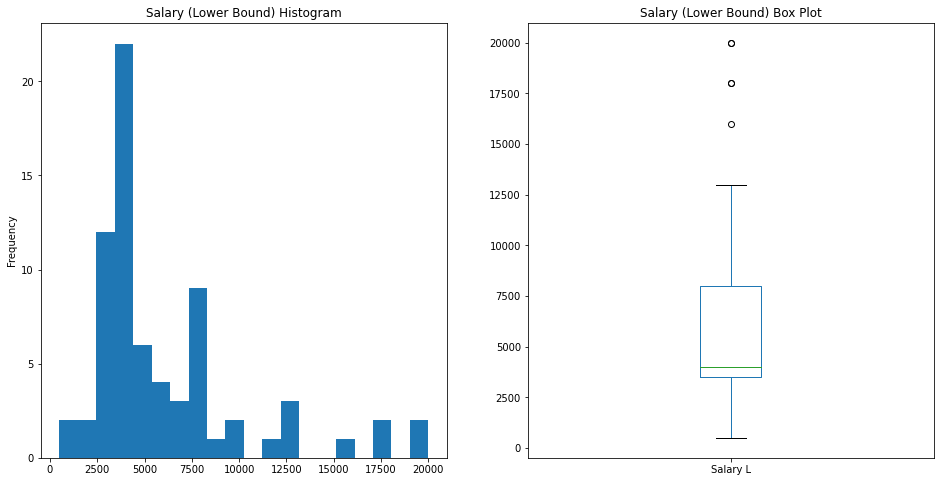

In [81]:
plot_distribution(df_dsc['Salary L'], title="Salary (Lower Bound)")

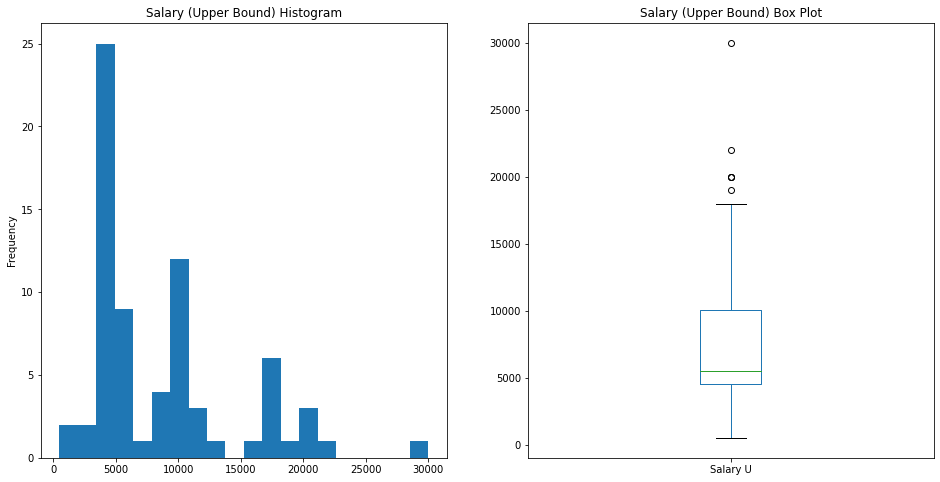

In [82]:
plot_distribution(df_dsc['Salary U'], title="Salary (Upper Bound)")

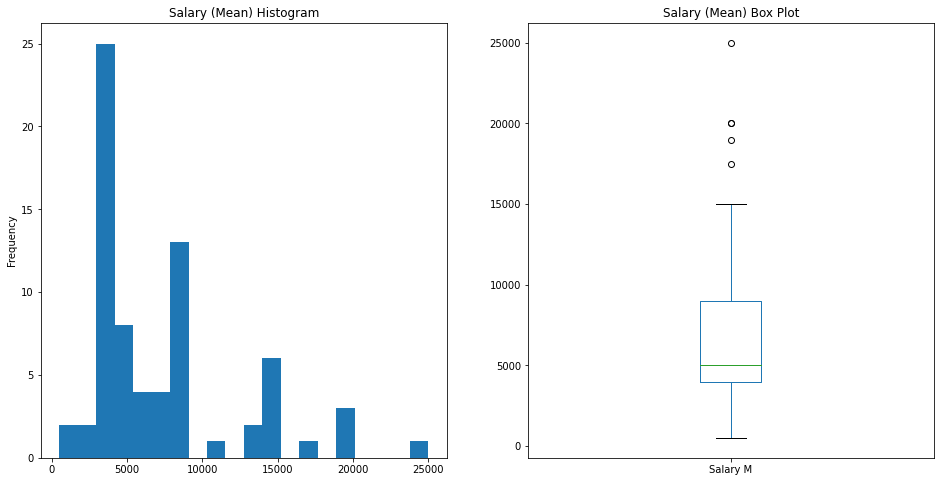

In [83]:
plot_distribution(df_dsc['Salary M'], title="Salary (Mean)")

#### Without outliers

In [84]:
ds_salary = remove_outliers(df_dsc['Salary M'])
ds_salary.describe()

count       67.000000
mean      6376.554726
std       3689.238982
min        500.000000
25%       4000.000000
50%       4500.000000
75%       8997.000000
max      15000.000000
Name: Salary M, dtype: float64

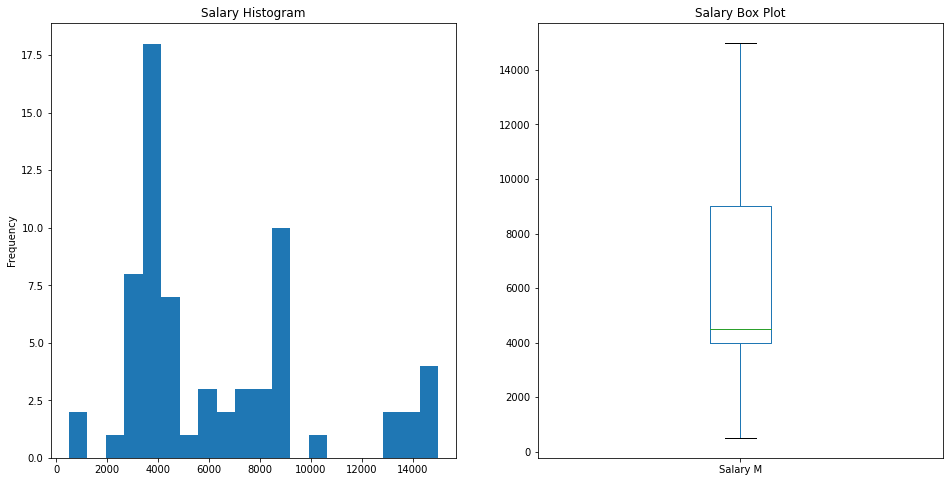

In [85]:
plot_distribution(ds_salary, title="Salary")

### Machine Learning Engineer

In [86]:
df_mles = df_mlec.loc[df_mlec['Salary'] == '0']
df_mlec = df_mlec.loc[df_mlec['Salary'] != '0']
df_mles.describe(include='all')

,Job_Title,Salary,Levels,Salary L,Salary U,Salary M
count,302,302,302,302.0,302.0,302.0
unique,184,1,14,NaN,NaN,NaN
top,Senior Data Engineer,0,Mid Level,NaN,NaN,NaN
freq,14,302,63,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.0,0.0,0.0
std,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,0.0,0.0,0.0
25%,NaN,NaN,NaN,0.0,0.0,0.0
50%,NaN,NaN,NaN,0.0,0.0,0.0
75%,NaN,NaN,NaN,0.0,0.0,0.0


In [87]:
df_mlec.describe()

,Salary L,Salary U,Salary M
count,67.000000,67.000000,67.000000
mean,5360.656716,8040.716418,6700.686567
std,3305.367946,4705.378479,3935.638804
min,500.000000,500.000000,500.000000
25%,2550.000000,4750.000000,3875.000000
50%,4500.000000,7500.000000,6250.000000
75%,9000.000000,13000.000000,11000.000000
max,13000.000000,20000.000000,15000.000000


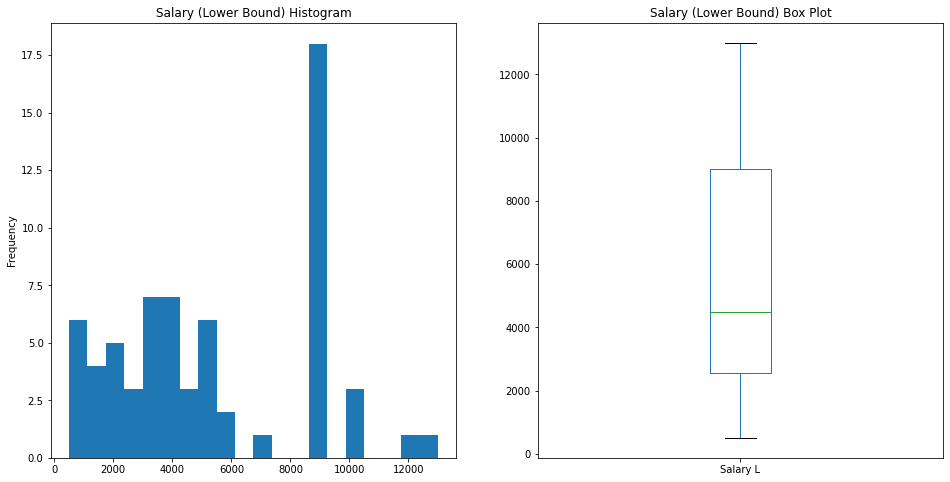

In [88]:
plot_distribution(df_mlec['Salary L'], title="Salary (Lower Bound)")

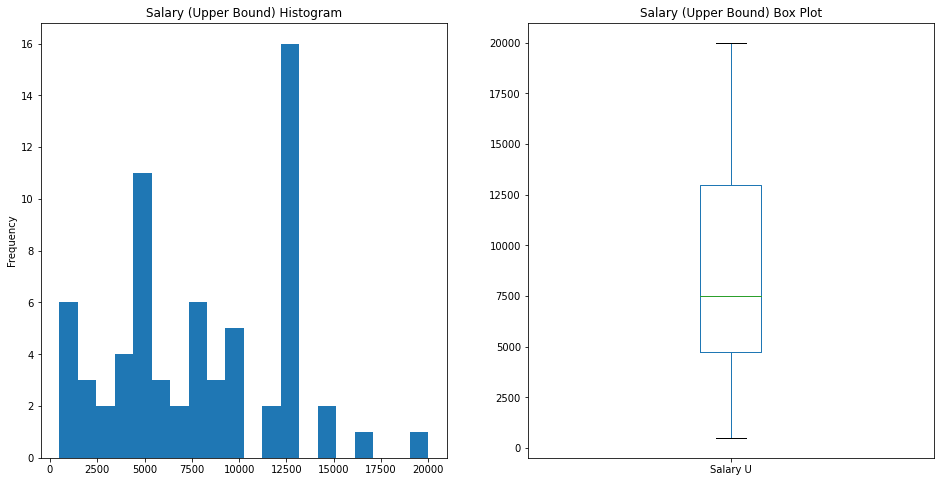

In [89]:
plot_distribution(df_mlec['Salary U'], title="Salary (Upper Bound)")

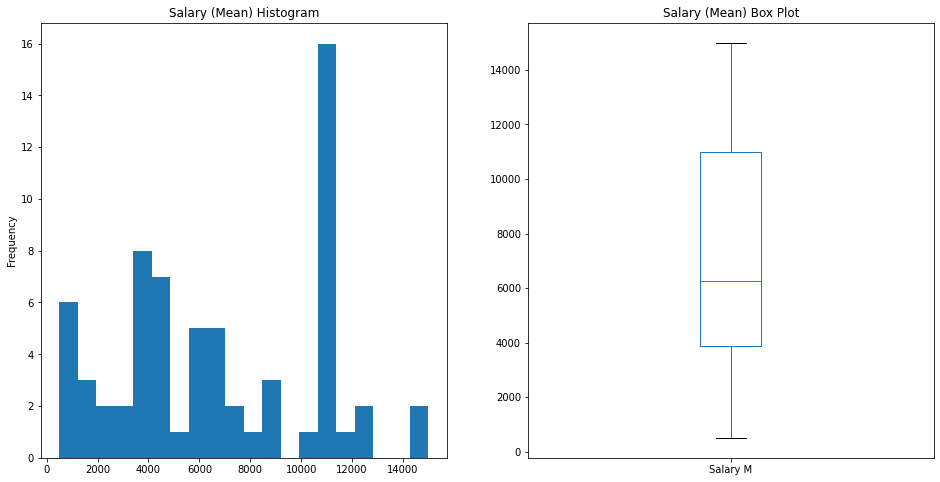

In [90]:
plot_distribution(df_mlec['Salary M'], title="Salary (Mean)")

#### Without outliers

In [91]:
mle_salary = remove_outliers(df_mlec['Salary M'])
mle_salary.describe()

count       67.000000
mean      6700.686567
std       3935.638804
min        500.000000
25%       3875.000000
50%       6250.000000
75%      11000.000000
max      15000.000000
Name: Salary M, dtype: float64

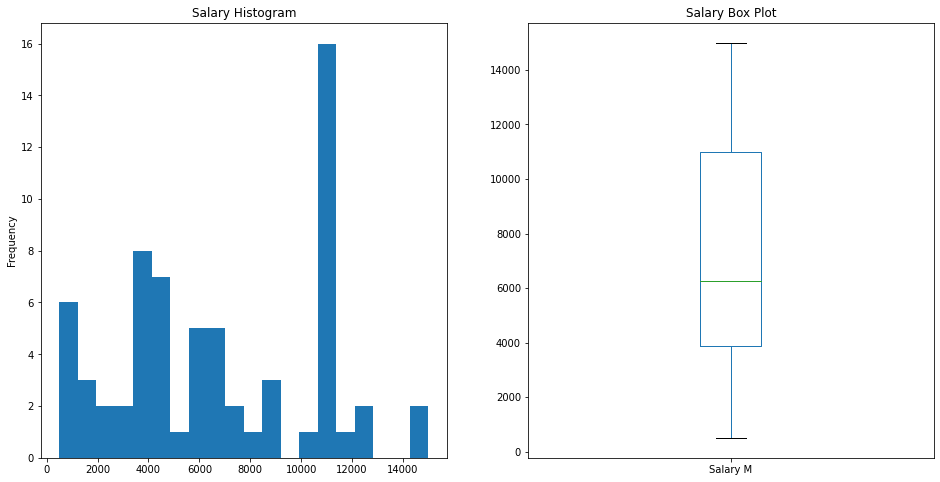

In [92]:
plot_distribution(mle_salary, title="Salary")

# Data Distribution By Title

## Data Analyst

In [69]:
def describe_and_plot(df, level, outliers=True):
    df_temp = df[df['Levels'].str.contains(level, na=False)]
    if not outliers:
        df_temp['Salary L'] = remove_outliers(df_temp['Salary L'])
        df_temp['Salary U'] = remove_outliers(df_temp['Salary U'])
        df_temp['Salary M'] = remove_outliers(df_temp['Salary M'])
    print(df_temp.describe())
    print()
    plot_distribution(df_temp['Salary M'], title="Salary ({})".format(level))

### Junior

           Salary L      Salary U      Salary M
count    226.000000    226.000000    226.000000
mean    3379.966814   4565.522861   3972.744838
std     1319.799742   2061.150049   1642.911162
min      500.000000    500.000000    500.000000
25%     2725.000000   3500.000000   3100.000000
50%     3500.000000   4500.000000   4000.000000
75%     4000.000000   5000.000000   4500.000000
max    10000.000000  17000.000000  13500.000000



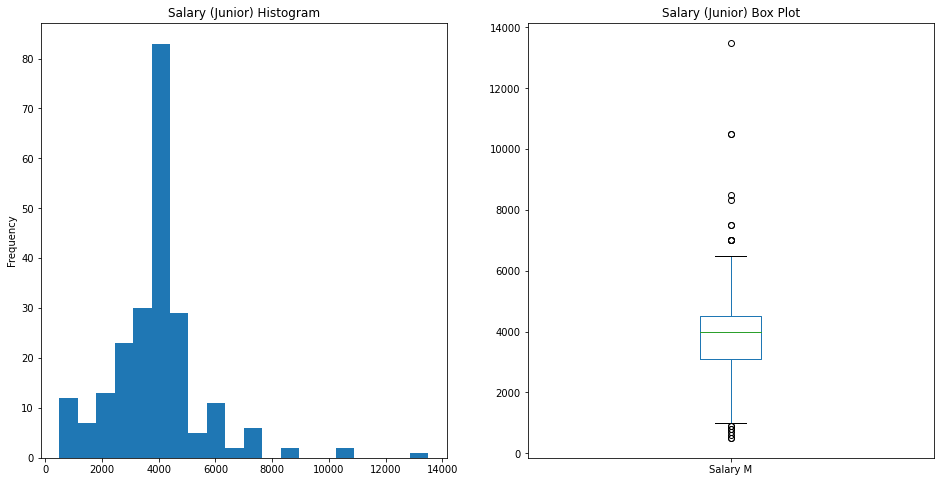

In [70]:
describe_and_plot(df_dac, "Junior")

          Salary L     Salary U     Salary M
count   212.000000   196.000000   207.000000
mean   3361.191038  4335.245748  3854.140097
std     995.302844  1092.557847  1084.190228
min    1000.000000  1500.000000  1000.000000
25%    2800.000000  3500.000000  3150.000000
50%    3500.000000  4500.000000  4000.000000
75%    4000.000000  5000.000000  4250.000000
max    5833.333333  7200.000000  6500.000000



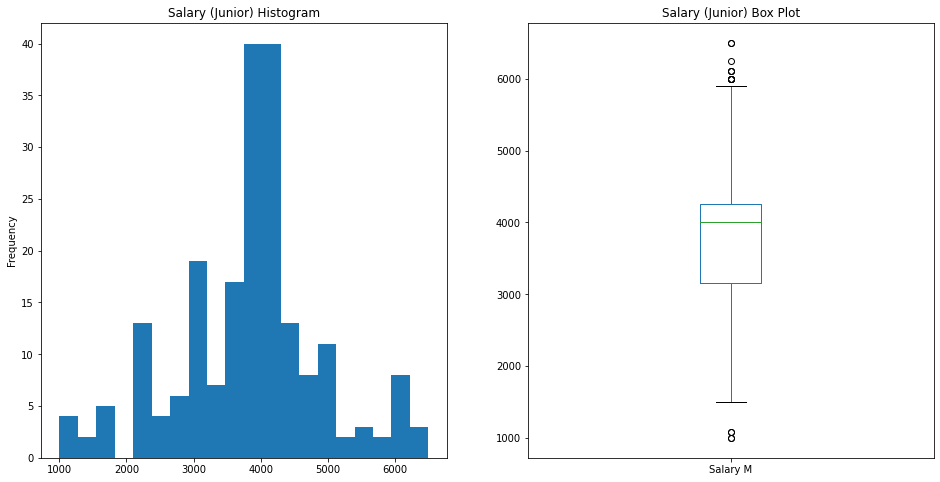

In [71]:
describe_and_plot(df_dac, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count    331.000000    331.000000    331.000000
mean    5232.972462   7190.234990   6211.603726
std     2846.200536   3292.253624   2961.230449
min      300.000000    500.000000    400.000000
25%     3500.000000   5000.000000   4500.000000
50%     4500.000000   7000.000000   5625.000000
75%     6000.000000   9000.000000   7500.000000
max    24000.000000  25000.000000  24000.000000



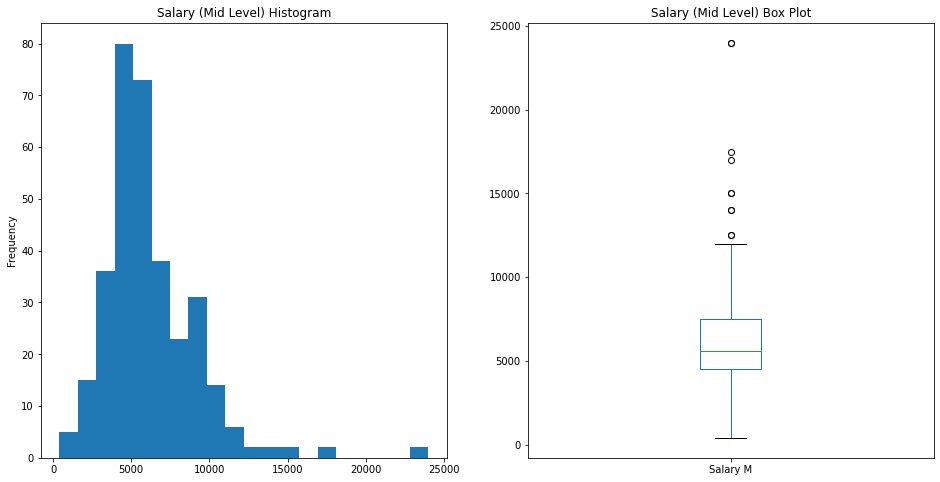

In [72]:
describe_and_plot(df_dac, "Mid Level")

          Salary L      Salary U      Salary M
count   311.000000    325.000000    321.000000
mean   4739.916029   6935.285482   5889.535306
std    1865.399033   2689.408685   2256.162547
min     300.000000    500.000000    400.000000
25%    3500.000000   5000.000000   4500.000000
50%    4500.000000   6500.000000   5500.000000
75%    6000.000000   8500.000000   7150.000000
max    9000.000000  15000.000000  12000.000000



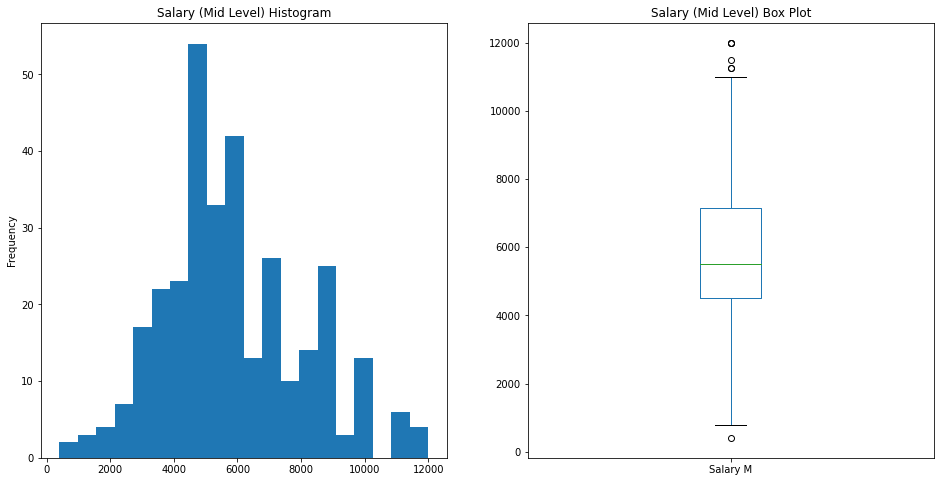

In [73]:
describe_and_plot(df_dac, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count    174.000000    174.000000    174.000000
mean    5891.909684   7880.529780   6886.219732
std     3952.609532   4488.735597   4123.181668
min      998.400000    998.400000    998.400000
25%     3575.000000   4800.000000   4250.000000
50%     4800.000000   7000.000000   6000.000000
75%     7000.000000   9500.000000   8187.500000
max    24000.000000  25000.000000  24000.000000



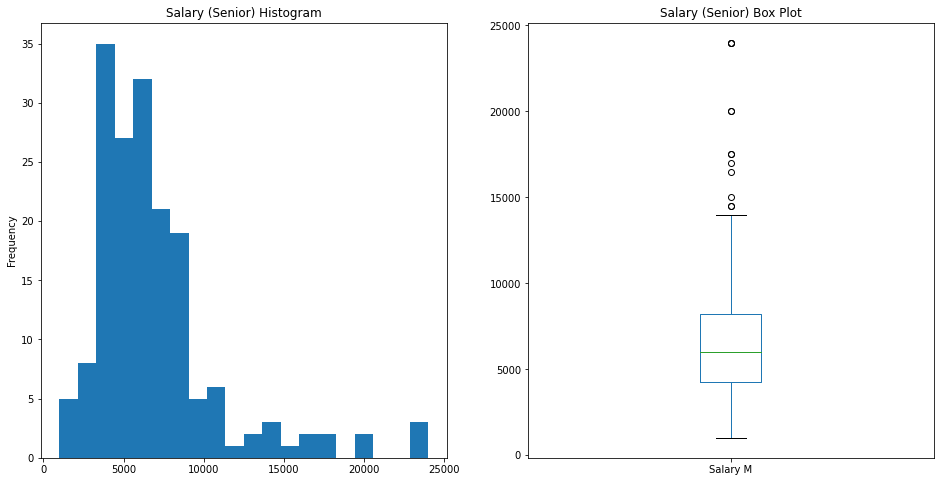

In [74]:
describe_and_plot(df_dac, "Senior")

           Salary L      Salary U      Salary M
count    163.000000    162.000000    162.000000
mean    5077.866779   6921.062850   6010.507613
std     2246.367877   2756.845495   2482.857573
min      998.400000    998.400000    998.400000
25%     3500.000000   4525.000000   4250.000000
50%     4600.000000   7000.000000   5750.000000
75%     6000.000000   9000.000000   7500.000000
max    12000.000000  14500.000000  14000.000000



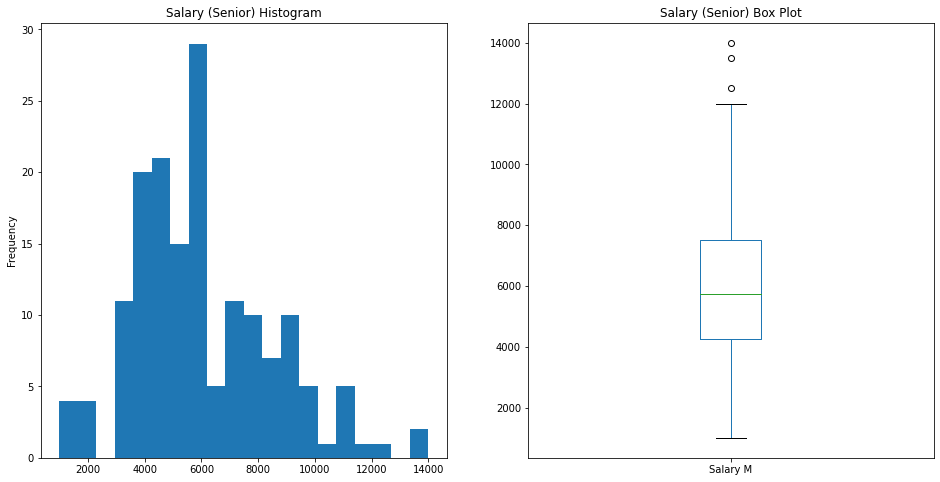

In [75]:
describe_and_plot(df_dac, "Senior", outliers=False)

## Data Engineer

### Junior

           Salary L      Salary U      Salary M
count     20.000000     20.000000     20.000000
mean    3197.500000   4632.500000   3915.000000
std     2157.390907   3334.519416   2738.137092
min      500.000000    500.000000    500.000000
25%     1500.000000   2500.000000   1987.500000
50%     3000.000000   4500.000000   3750.000000
75%     4000.000000   5625.000000   5000.000000
max    10000.000000  15000.000000  12500.000000



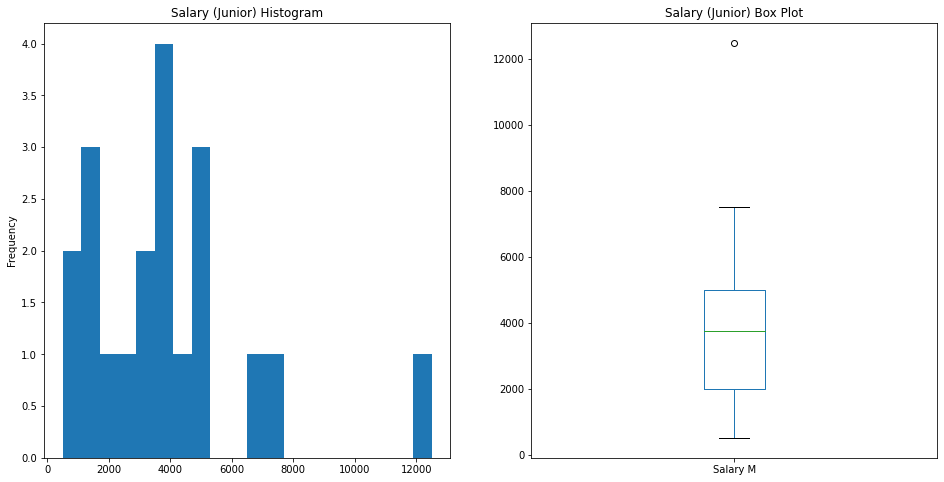

In [76]:
describe_and_plot(df_dec, "Junior")

          Salary L     Salary U     Salary M
count    19.000000    19.000000    19.000000
mean   2839.473684  4086.842105  3463.157895
std    1485.539459  2334.752075  1898.379580
min     500.000000   500.000000   500.000000
25%    1500.000000  2200.000000  1825.000000
50%    3000.000000  4500.000000  3750.000000
75%    4000.000000  5250.000000  4750.000000
max    6000.000000  9000.000000  7500.000000



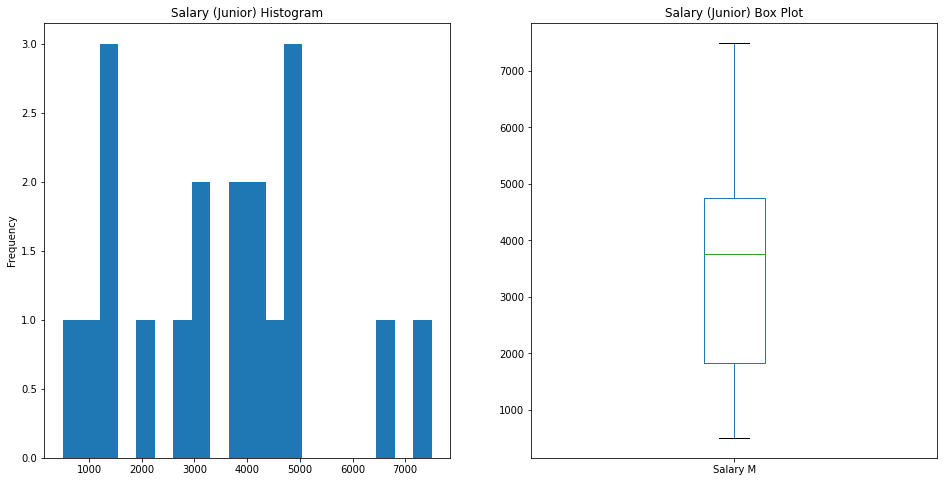

In [77]:
describe_and_plot(df_dec, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count     50.000000     50.000000     50.000000
mean    5206.333333   7377.000000   6291.666667
std     2610.702918   3703.049075   3055.771277
min      300.000000    300.000000    300.000000
25%     3125.000000   5000.000000   4500.000000
50%     4500.000000   7000.000000   5750.000000
75%     7000.000000   9750.000000   7947.916667
max    12000.000000  16000.000000  12500.000000



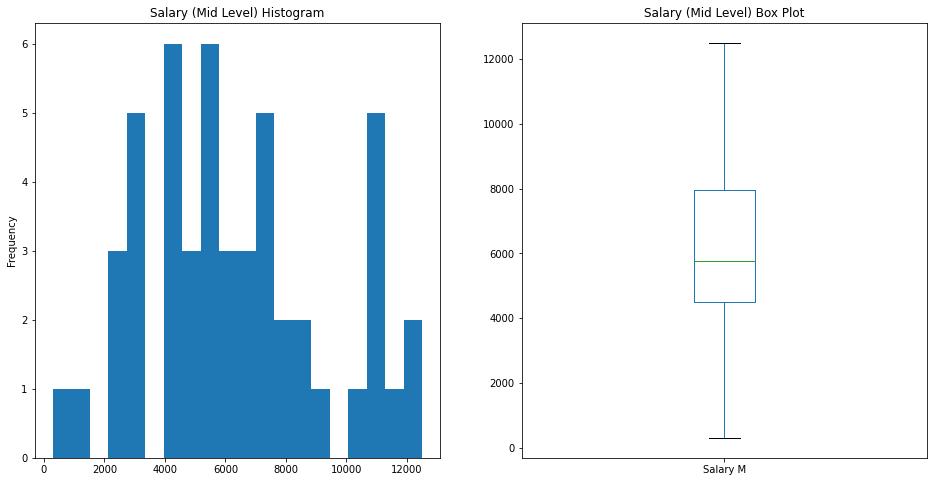

In [78]:
describe_and_plot(df_dec, "Mid Level")

           Salary L      Salary U      Salary M
count     50.000000     50.000000     50.000000
mean    5206.333333   7377.000000   6291.666667
std     2610.702918   3703.049075   3055.771277
min      300.000000    300.000000    300.000000
25%     3125.000000   5000.000000   4500.000000
50%     4500.000000   7000.000000   5750.000000
75%     7000.000000   9750.000000   7947.916667
max    12000.000000  16000.000000  12500.000000



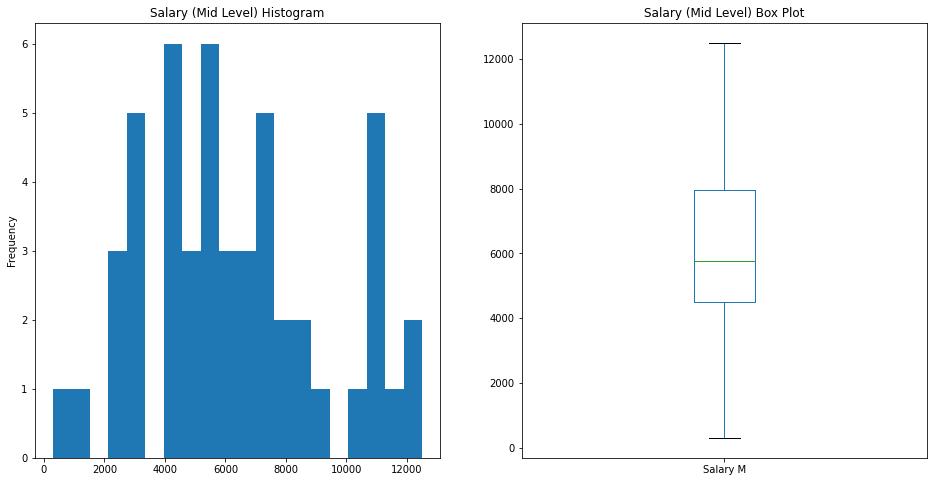

In [79]:
describe_and_plot(df_dec, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count     31.000000     31.000000     31.000000
mean    6239.784946   8437.096774   7338.440860
std     2631.752963   3783.428069   3164.653364
min      800.000000   1000.000000    900.000000
25%     4500.000000   5750.000000   5125.000000
50%     7000.000000   8000.000000   7250.000000
75%     8500.000000  10250.000000   9125.000000
max    10000.000000  16000.000000  12500.000000



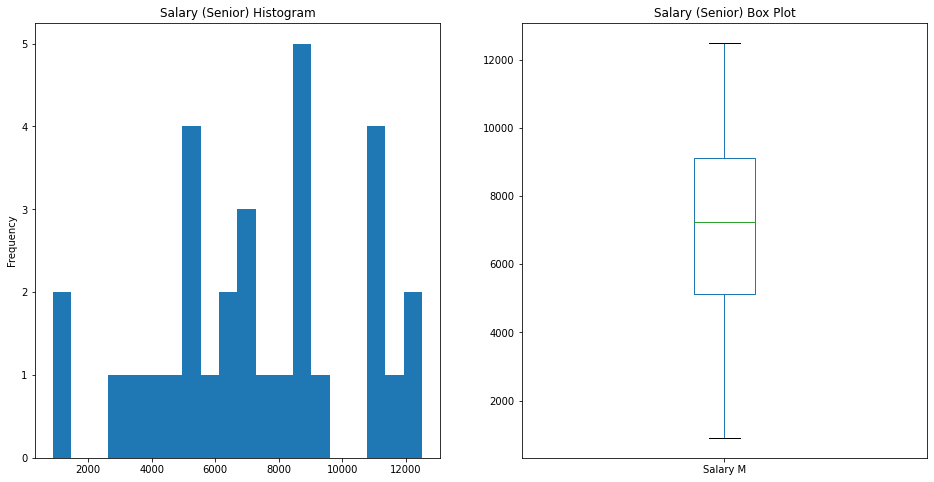

In [80]:
describe_and_plot(df_dec, "Senior")

           Salary L      Salary U      Salary M
count     31.000000     31.000000     31.000000
mean    6239.784946   8437.096774   7338.440860
std     2631.752963   3783.428069   3164.653364
min      800.000000   1000.000000    900.000000
25%     4500.000000   5750.000000   5125.000000
50%     7000.000000   8000.000000   7250.000000
75%     8500.000000  10250.000000   9125.000000
max    10000.000000  16000.000000  12500.000000



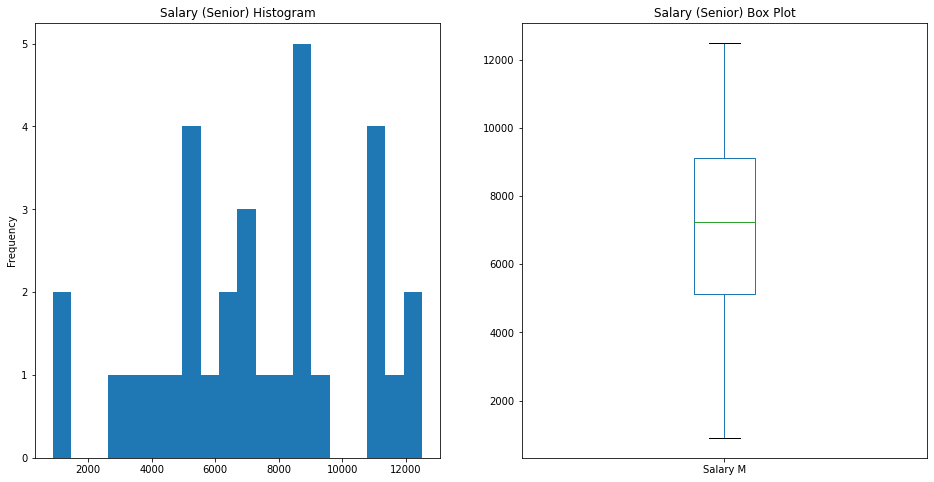

In [81]:
describe_and_plot(df_dec, "Senior", outliers=False)

## Data Scientist

### Junior

          Salary L     Salary U      Salary M
count    25.000000     25.00000     25.000000
mean   3804.000000   5120.00000   4462.000000
std    1618.507543   2484.45165   1977.176016
min     500.000000    500.00000    500.000000
25%    3500.000000   4500.00000   4000.000000
50%    3500.000000   4500.00000   4000.000000
75%    4000.000000   5000.00000   4500.000000
max    9000.000000  13000.00000  10500.000000



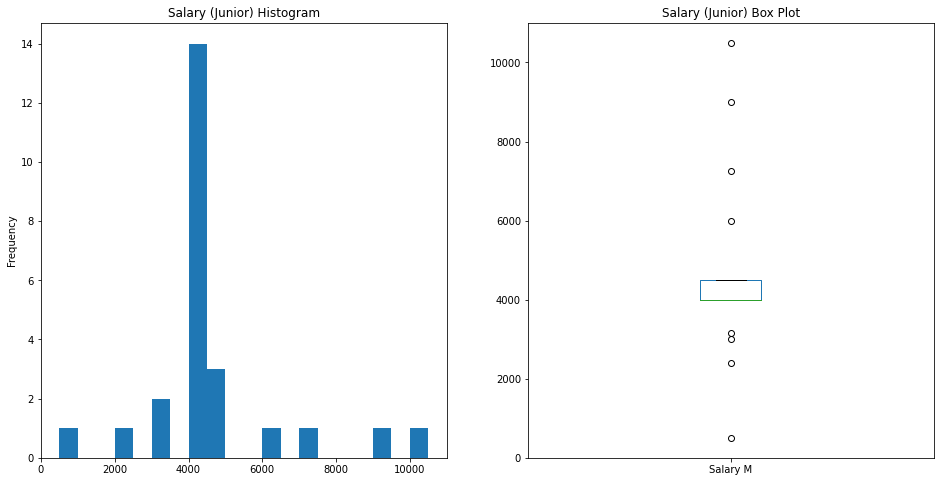

In [82]:
describe_and_plot(df_dsc, "Junior")

          Salary L     Salary U     Salary M
count    20.000000    17.000000    17.000000
mean   3640.000000  4588.235294  4102.941176
std     387.162417   196.476312   198.801556
min    2800.000000  4500.000000  4000.000000
25%    3500.000000  4500.000000  4000.000000
50%    3500.000000  4500.000000  4000.000000
75%    3625.000000  4500.000000  4000.000000
max    4500.000000  5000.000000  4500.000000



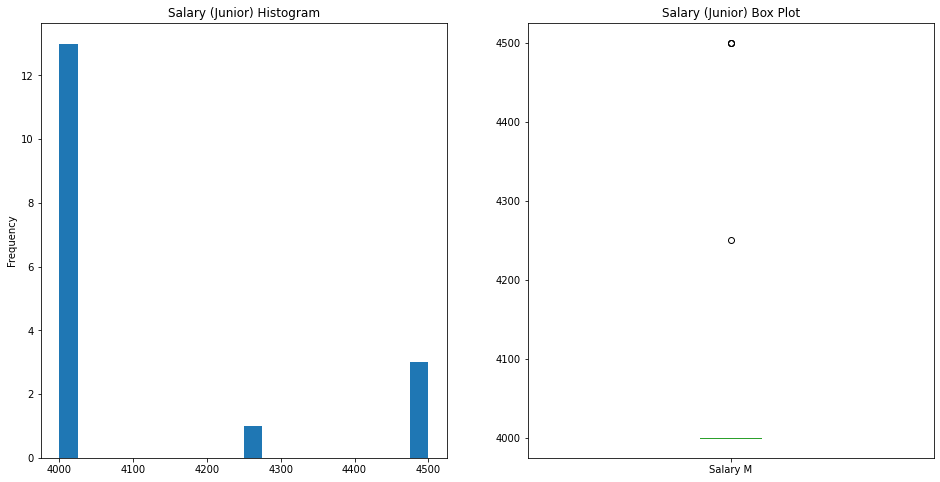

In [83]:
describe_and_plot(df_dsc, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count     36.000000     36.000000     36.000000
mean    5561.898148   8734.166667   7148.032407
std     3494.961766   5484.701682   4394.688031
min      833.333333   1250.000000   1041.666667
25%     2763.000000   4500.000000   3500.000000
50%     4500.000000   9400.000000   6997.000000
75%     7972.000000  10005.500000   9000.000000
max    20000.000000  30000.000000  25000.000000



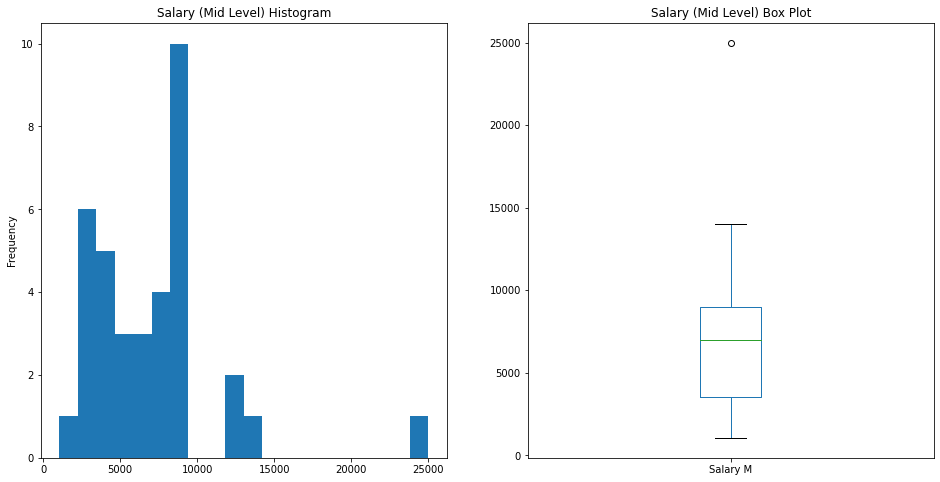

In [84]:
describe_and_plot(df_dsc, "Mid Level")

           Salary L      Salary U      Salary M
count     35.000000     35.000000     35.000000
mean    5149.380952   8126.571429   6637.976190
std     2503.537325   4157.599889   3200.030547
min      833.333333   1250.000000   1041.666667
25%     2726.000000   4500.000000   3500.000000
50%     4500.000000   9000.000000   6744.000000
75%     7486.000000  10000.000000   8998.500000
max    10000.000000  18000.000000  14000.000000



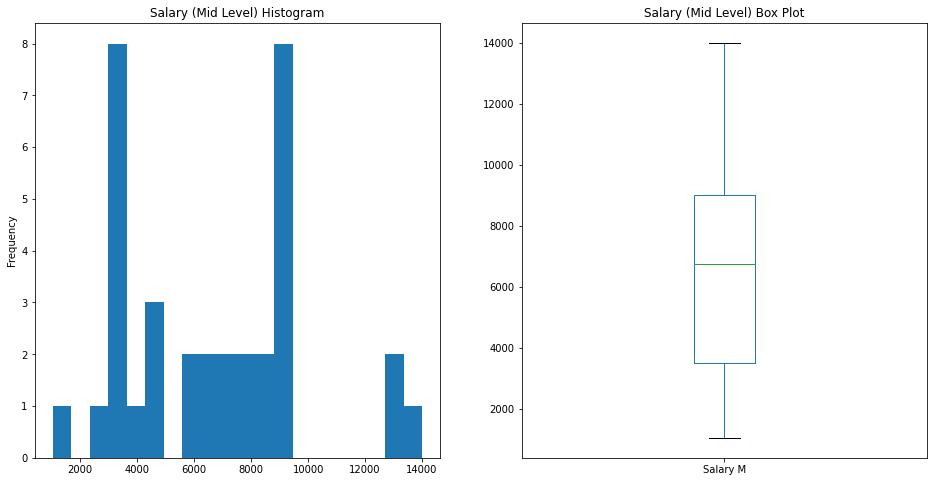

In [85]:
describe_and_plot(df_dsc, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count     26.000000     26.000000     26.000000
mean    8353.846154  11211.538462   9782.692308
std     6063.281670   7908.442422   6874.284578
min     3000.000000   4500.000000   4000.000000
25%     3500.000000   4500.000000   4000.000000
50%     4250.000000   5250.000000   4925.000000
75%    13000.000000  18000.000000  15000.000000
max    20000.000000  30000.000000  25000.000000



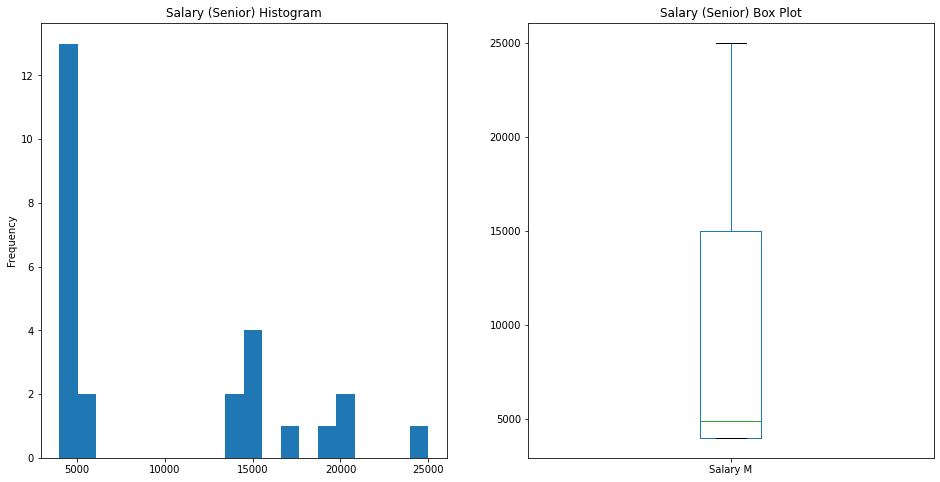

In [86]:
describe_and_plot(df_dsc, "Senior")

           Salary L      Salary U      Salary M
count     26.000000     26.000000     26.000000
mean    8353.846154  11211.538462   9782.692308
std     6063.281670   7908.442422   6874.284578
min     3000.000000   4500.000000   4000.000000
25%     3500.000000   4500.000000   4000.000000
50%     4250.000000   5250.000000   4925.000000
75%    13000.000000  18000.000000  15000.000000
max    20000.000000  30000.000000  25000.000000



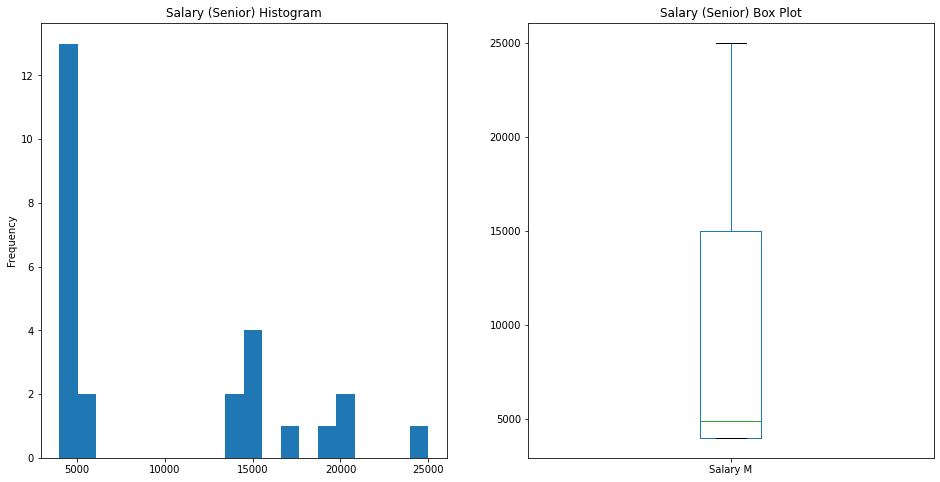

In [87]:
describe_and_plot(df_dsc, "Senior", outliers=False)

## Machine Learning Engineer

### Junior

           Salary L      Salary U      Salary M
count     21.000000     21.000000     21.000000
mean    3485.714286   5333.333333   4409.523810
std     2830.421473   3957.187553   3347.634204
min      500.000000    500.000000    500.000000
25%     2000.000000   3000.000000   2650.000000
50%     3000.000000   5000.000000   4000.000000
75%     3600.000000   6000.000000   4350.000000
max    10000.000000  15000.000000  12500.000000



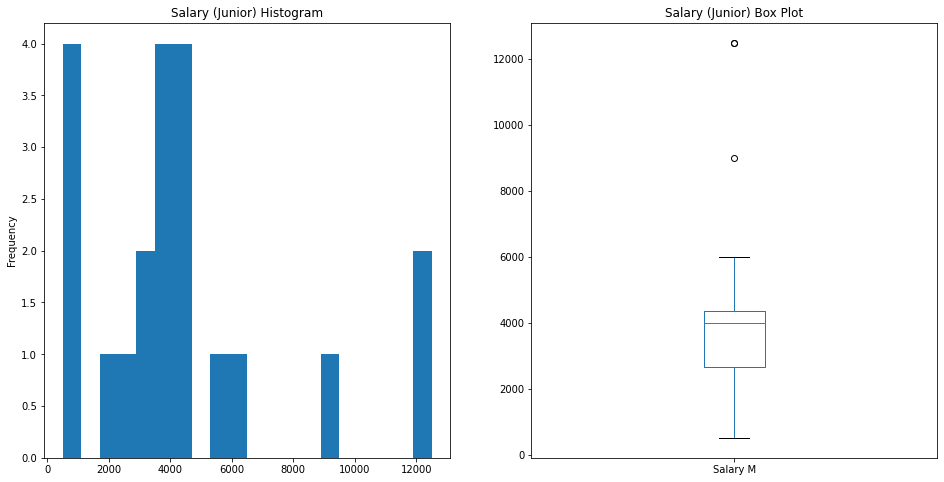

In [88]:
describe_and_plot(df_mlec, "Junior")

          Salary L     Salary U     Salary M
count    18.000000    19.000000    18.000000
mean   2455.555556  4315.789474  3255.555556
std    1232.988823  2433.849981  1683.474077
min     500.000000   500.000000   500.000000
25%    1625.000000  2750.000000  2162.500000
50%    2550.000000  5000.000000  4000.000000
75%    3500.000000  5450.000000  4225.000000
max    4500.000000  9000.000000  6000.000000



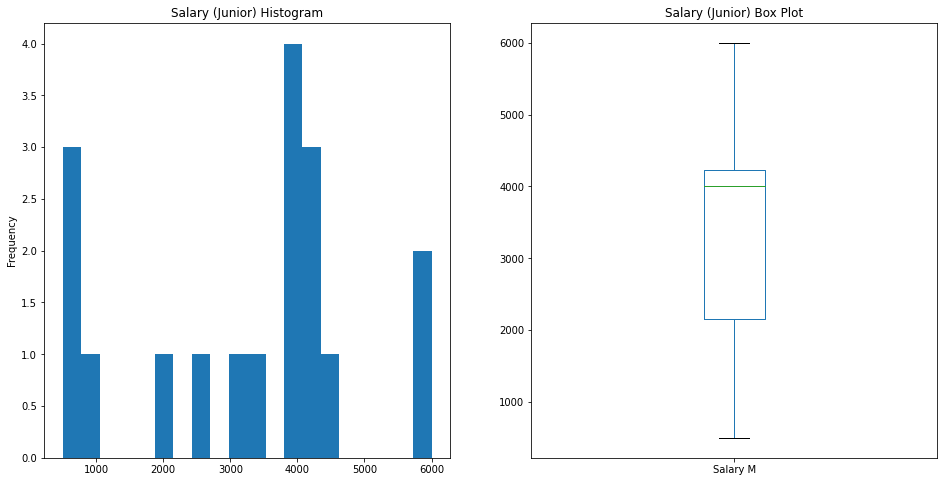

In [89]:
describe_and_plot(df_mlec, "Junior", outliers=False)

### Mid Level

           Salary L      Salary U      Salary M
count     46.000000     46.000000     46.000000
mean    5877.478261   8741.913043   7309.695652
std     3190.181310   4709.635003   3869.987631
min      700.000000    700.000000    700.000000
25%     4000.000000   5000.000000   4500.000000
50%     5000.000000  10000.000000   7500.000000
75%     9000.000000  13000.000000  11000.000000
max    12000.000000  20000.000000  14600.000000



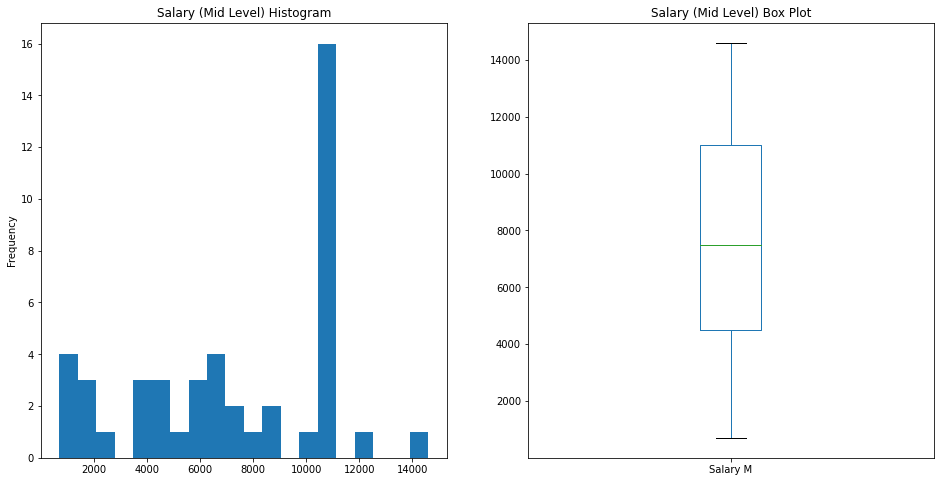

In [90]:
describe_and_plot(df_mlec, "Mid Level")

           Salary L      Salary U      Salary M
count     46.000000     46.000000     46.000000
mean    5877.478261   8741.913043   7309.695652
std     3190.181310   4709.635003   3869.987631
min      700.000000    700.000000    700.000000
25%     4000.000000   5000.000000   4500.000000
50%     5000.000000  10000.000000   7500.000000
75%     9000.000000  13000.000000  11000.000000
max    12000.000000  20000.000000  14600.000000



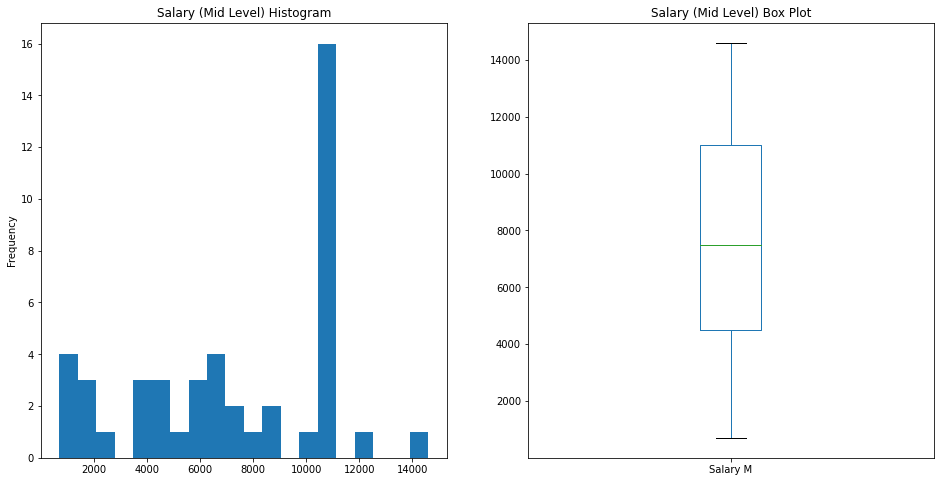

In [91]:
describe_and_plot(df_mlec, "Mid Level", outliers=False)

### Senior

           Salary L      Salary U      Salary M
count     24.000000     24.000000     24.000000
mean    8116.666667  11666.666667   9891.666667
std     2657.338758   3509.820591   3043.548653
min     2300.000000   3000.000000   2650.000000
25%     9000.000000  12250.000000  10750.000000
50%     9000.000000  13000.000000  11000.000000
75%     9000.000000  13000.000000  11000.000000
max    13000.000000  17000.000000  15000.000000



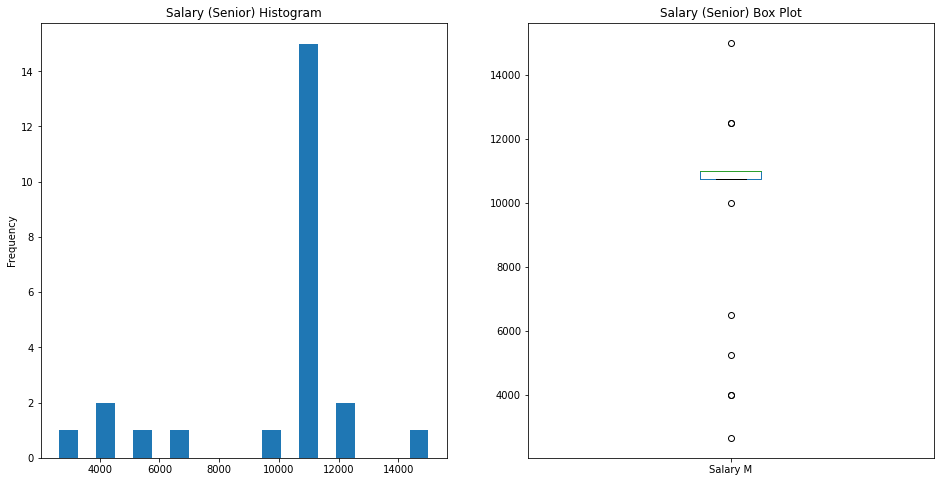

In [92]:
describe_and_plot(df_mlec, "Senior")

       Salary L  Salary U  Salary M
count      15.0      15.0      15.0
mean     9000.0   13000.0   11000.0
std         0.0       0.0       0.0
min      9000.0   13000.0   11000.0
25%      9000.0   13000.0   11000.0
50%      9000.0   13000.0   11000.0
75%      9000.0   13000.0   11000.0
max      9000.0   13000.0   11000.0



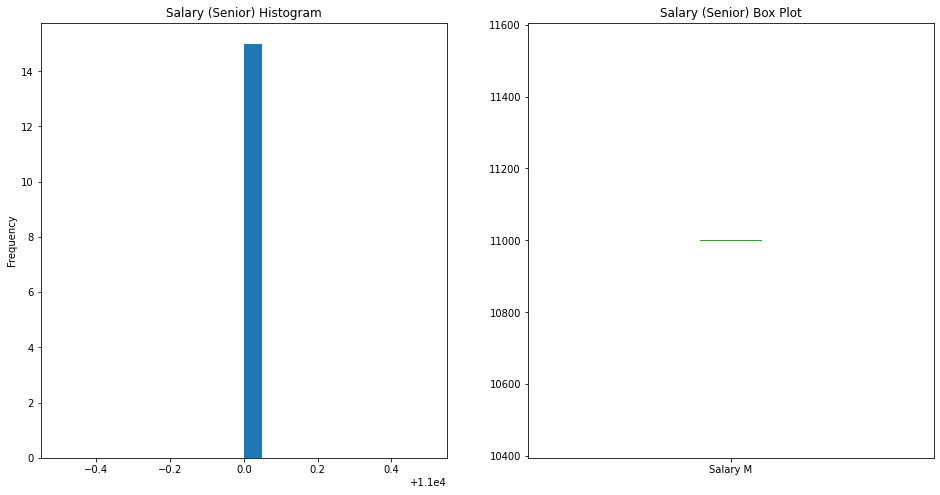

In [93]:
describe_and_plot(df_mlec, "Senior", outliers=False)

## Sample Counts

In [118]:
def sample_count(df_salary, df_without):
    df = pd.DataFrame(columns=['Count', 'Junior', 'Mid Level', 'Senior', 'Total'])
    # Salary
    j_count = df_salary['Levels'].str.contains('Junior').value_counts()[True]
    m_count = df_salary['Levels'].str.contains('Mid Level').value_counts()[True]
    s_count = df_salary['Levels'].str.contains('Senior').value_counts()[True]
    t_count = len(df_salary)
    df.loc[0] = ['Salary', j_count, m_count, s_count, t_count]
    # Without Salary
    j_count = df_without['Levels'].str.contains('Junior').value_counts()[True]
    m_count = df_without['Levels'].str.contains('Mid Level').value_counts()[True]
    s_count = df_without['Levels'].str.contains('Senior').value_counts()[True]
    t_count = len(df_without)
    df.loc[1] = ['Without', j_count, m_count, s_count, t_count]
    df.loc[2] = df.loc[0] + df.loc[1]
    return df

In [120]:
sample_count(df_dac, df_das)

,Count,Junior,Mid Level,Senior,Total
0,Salary,226,331,174,614
1,Without,429,1529,673,2300
2,SalaryWithout,655,1860,847,2914


In [121]:
sample_count(df_dec, df_des)

,Count,Junior,Mid Level,Senior,Total
0,Salary,95,225,142,759
1,Without,251,908,661,2634
2,SalaryWithout,346,1133,803,3393


In [122]:
sample_count(df_dsc, df_dss)

,Count,Junior,Mid Level,Senior,Total
0,Salary,25,36,26,72
1,Without,56,220,119,348
2,SalaryWithout,81,256,145,420


In [123]:
sample_count(df_mlec, df_mles)

,Count,Junior,Mid Level,Senior,Total
0,Salary,21,46,25,67
1,Without,46,171,136,302
2,SalaryWithout,67,217,161,369
